# Group Assignment 4
**_Arturo Jacobo & Miranda Mead-Newton_**

We opted for: Conduct a thorough point pattern analysis of your dataset. Your notebook should include a KDE plot, as well as a centrography analysis, indicating central tendencies of your data (mean, median, ellipse). Include different "slices" of your data to produce meaningful results (e.g. kde plots for different categorical values).


## Importing data and libraries
For this assignment, we are visualizing bus stop location data. We are using data from Metro's data center. The datasets we're using are called Stops Serving Lines and Lines Serving Stops. We will explore which of these is more appropriate for our visualization purposes. 

In [1]:
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

In [2]:
ssl = gpd.read_file('data/JUN20_Stops_Serving_Lines.shp')

In [3]:
lss = gpd.read_file('data/JUN20_Lines_Serving_Stops.shp')

## Exploring Data

In [4]:
ssl.head()

,STOPNUM,STOPNAME,LAT,LONG,LINE_DIR_1,LINE_DIR_2,LINE_DIR_3,LINE_DIR_4,LINE_DIR_5,LINE_DIR_6,...,LINE_DIR_8,LINE_DIR_9,LINE_DIR_A,LINE_DIR_B,LINE_DIR_C,LINE_DIR_D,LINE_DIR_E,LINE_DIR_F,LINE_DIR_G,geometry
0,1,PARAMOUNT / SLAUSON,33.973248,-118.113113,108-E,265-S,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-118.11311 33.97325)
1,3,JEFFERSON / 10TH,34.025471,-118.328402,35-N,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-118.32840 34.02547)
2,6,120TH \ AUGUSTUS F HAWKINS,33.924696,-118.242222,55-N,120-W,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-118.24222 33.92470)
3,7,120TH \ MARTIN LUTHER KING HOSPITAL,33.924505,-118.240369,55-S,120-E,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-118.24037 33.92451)
4,8,120TH / CRENSHAW,33.923818,-118.326886,126-E,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-118.32689 33.92382)


In [5]:
lss.head()

,STOPNUM,LINE,DIR,STOPNAME,LAT,LONG,geometry
0,1,108,E,PARAMOUNT / SLAUSON,33.973248,-118.113113,POINT (-118.11311 33.97325)
1,1,265,S,PARAMOUNT / SLAUSON,33.973248,-118.113113,POINT (-118.11311 33.97325)
2,3,35,N,JEFFERSON / 10TH,34.025471,-118.328402,POINT (-118.32840 34.02547)
3,6,55,N,120TH \ AUGUSTUS F HAWKINS,33.924696,-118.242222,POINT (-118.24222 33.92470)
4,6,120,W,120TH \ AUGUSTUS F HAWKINS,33.924696,-118.242222,POINT (-118.24222 33.92470)


In [6]:
lss.query('STOPNUM == "29"')

,STOPNUM,LINE,DIR,STOPNAME,LAT,LONG,geometry
20,29,33,E,2ND / SANTA MONICA,34.015028,-118.497346,POINT (-118.49735 34.01503)
21,29,33,W,2ND / SANTA MONICA,34.015028,-118.497346,POINT (-118.49735 34.01503)
22,29,733,E,2ND / SANTA MONICA,34.015028,-118.497346,POINT (-118.49735 34.01503)
23,29,733,W,2ND / SANTA MONICA,34.015028,-118.497346,POINT (-118.49735 34.01503)


In [7]:
ssl.query('STOPNUM == "29"')

,STOPNUM,STOPNAME,LAT,LONG,LINE_DIR_1,LINE_DIR_2,LINE_DIR_3,LINE_DIR_4,LINE_DIR_5,LINE_DIR_6,...,LINE_DIR_8,LINE_DIR_9,LINE_DIR_A,LINE_DIR_B,LINE_DIR_C,LINE_DIR_D,LINE_DIR_E,LINE_DIR_F,LINE_DIR_G,geometry
15,29,2ND / SANTA MONICA,34.015028,-118.497346,33-E,33-W,733-E,733-W,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-118.49735 34.01503)


It appears that Stops Serving Lines (SSL) displays each bus stop once and columns for each bus line that stops there. Lines Serving Stops (LSS) lists each bus stop multiple times for each line it serves. We're going to use LSS because the duplicate stops per bus line gives a better indication of service level (more bus lines means more access). We want to visualize where bus stops are concentrated (or where bus access is concentrated) geographically in LA. 

## Visualizing Data

In [8]:
lss_web_mercator = lss.to_crs(epsg=3857)

Reprojecting the dataframe to web mercator. 

Here is an initial visualization of the data with a basemap. 

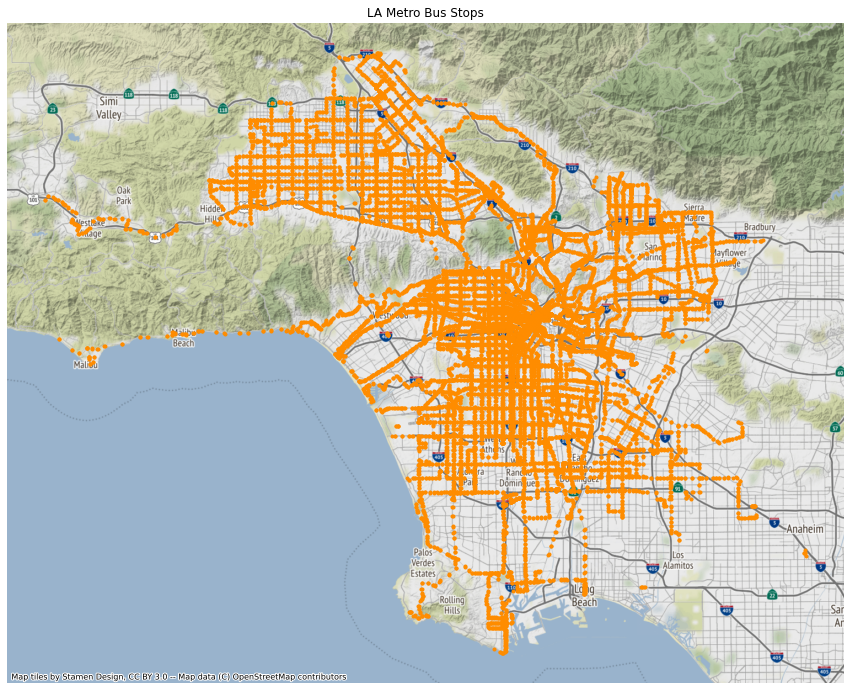

In [9]:
fig, ax = plt.subplots(figsize=(15,15))

lss_web_mercator.plot(ax=ax, color='darkorange', marker='.')

ax.axis('off')


ax.set_title('LA Metro Bus Stops')

ctx.add_basemap(ax)

Though you can't tell in this map, some of the bus stops are plotted on top of each other. The following maps will help us better visualize the concentration of bus stops. 

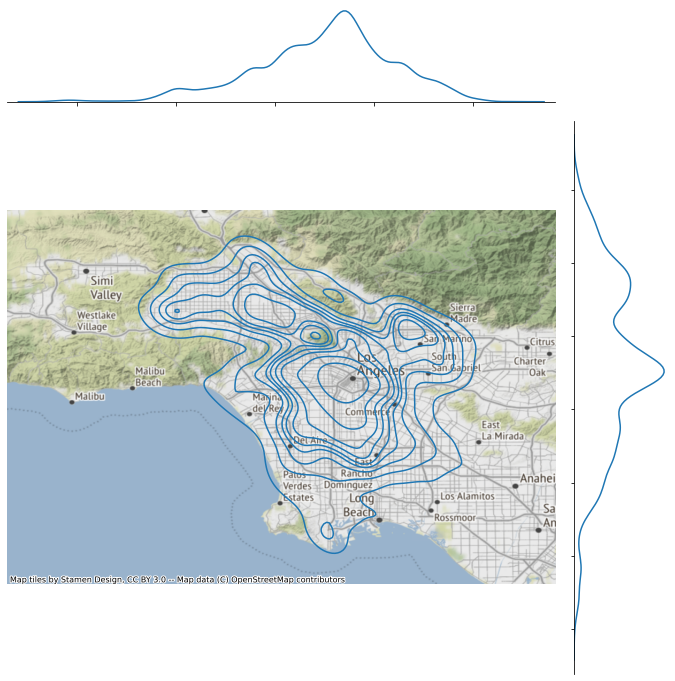

In [10]:
g = sns.jointplot(data = lss,
                  x='LONG', 
                  y='LAT',
                  kind='kde',
                  height=10 # make the map bigger
                 )

# Clean axes
g.ax_joint.set_axis_off()

# add basemap
ctx.add_basemap(g.ax_joint,
                crs='epsg:4326')

This is a KDE map. To be perfectly honest, I don't know what exactly the lines are telling us. The graphs on the side of the maps are interesting, however. It's clear that bus access is concentrated around downtown and central LA. 

Below, we're creating a map that shows the mean center and median center of our dataset. 

In [11]:
# compute the mean and median centers
mean_center = centrography.mean_center(lss[['LONG','LAT']])
med_center = centrography.euclidean_median(lss[['LONG','LAT']])

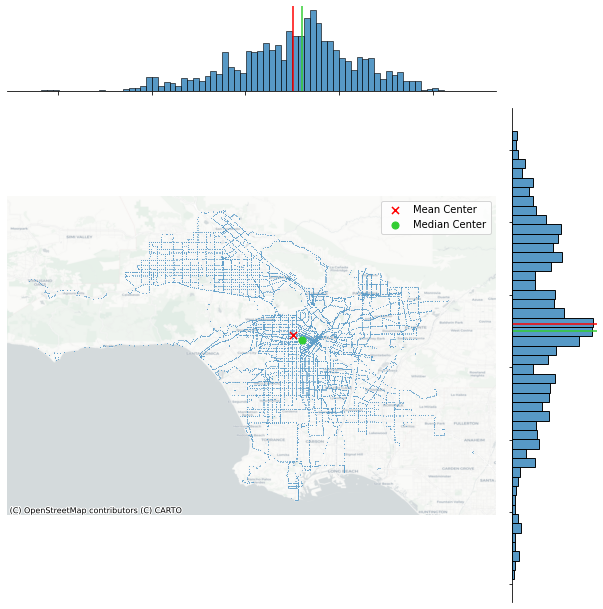

In [12]:
# Generate scatter plot
g = sns.jointplot(
    x='LONG', y='LAT', data=lss, s=0.75, height=9
)

# Add mean point and marginal lines
g.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
g.ax_marg_x.axvline(mean_center[0], color='red')
g.ax_marg_y.axhline(mean_center[1], color='red')

# Add median point and marginal lines
g.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
g.ax_marg_x.axvline(med_center[0], color='limegreen')
g.ax_marg_y.axhline(med_center[1], color='limegreen')

# Legend
g.ax_joint.legend()

# Add basemap
ctx.add_basemap(
    g.ax_joint, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

# Clean axes
g.ax_joint.set_axis_off()

# Display
plt.show()

While the Mean and Median are fairly close, the mean is getting pulled toward the outliers in the valley. 

Next, we'll add a standard deviation ellipse.

In [13]:
major, minor, rotation = centrography.ellipse(lss[['LONG','LAT']])

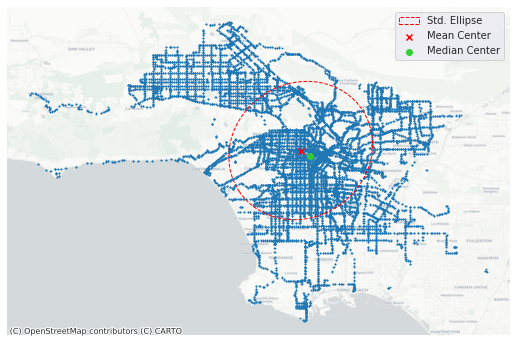

In [14]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(lss['LONG'], lss['LAT'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('off')

# add a basemap
ctx.add_basemap(ax,
                crs='epsg:4326',
                source=ctx.providers.CartoDB.Positron)

# Display
plt.show()

## Visualizing Bus Stops by Metro Bus Type

Now, we'll create the same map above but with a drop down that allows you to select the type of bus line. Metro categorizes bus line types by their line number. First, we need to create a variable that dictates the type of metro bus line. We're using these definitions from Metro's data center, however, the data we're using might be from a different time than when these lines were defined. 

In [15]:
lss['BusLineType'] = 'NaN'

In [16]:
lss.loc[(lss['LINE']>=2) & (lss['LINE']<=96),'BusLineType'] = 'LocalCBD'
lss.loc[(lss['LINE']>=102) & (lss['LINE']<=292),'BusLineType'] = 'LocalNonCBD'
lss.loc[((lss['LINE']>=344) & (lss['LINE']<=577)) | (lss['LINE']==788),'BusLineType'] = 'MetroLimitedExpress'
lss.loc[(lss['LINE']>=603) & (lss['LINE']<=687),'BusLineType'] = 'CommCirc'
lss.loc[((lss['LINE']>=704) & (lss['LINE']<=794) & (lss['LINE']!=788)) | ((lss['LINE']>=901) & (lss['LINE']<=910)),'BusLineType'] = 'RapidBRT'

In [17]:
lss.query('BusLineType == "NaN"')

,STOPNUM,LINE,DIR,STOPNAME,LAT,LONG,geometry,BusLineType
559,585,601,N,CANOGA / BURBANK,34.173160,-118.597283,POINT (-118.59728 34.17316),NaN
686,705,602,E,CHURCH / FARLIN,34.068141,-118.463081,POINT (-118.46308 34.06814),NaN
687,706,602,E,CHURCH / HOMEDALE,34.069308,-118.464094,POINT (-118.46409 34.06931),NaN
688,707,602,E,CHURCH / JOFFRE,34.070529,-118.465234,POINT (-118.46523 34.07053),NaN
977,973,601,N,DE SOTO / BURBANK,34.171750,-118.588356,POINT (-118.58836 34.17175),NaN
...,...,...,...,...,...,...,...,...
15401,16770,602,E,VETERAN FEDERAL BUILDING,34.057022,-118.447281,POINT (-118.44728 34.05702),NaN
15402,16770,602,W,VETERAN FEDERAL BUILDING,34.057022,-118.447281,POINT (-118.44728 34.05702),NaN
16570,20004,602,W,WILSHIRE / VETERAN,34.057616,-118.447888,POINT (-118.44789 34.05762),NaN
17344,43426,601,S,WARNER CENTER TRANSIT HUB,34.181099,-118.601635,POINT (-118.60164 34.18110),NaN


Upon further research, it looks like the bus lines were defined for the 2019 data. This bus stop data is from 2020. So it looks like there is some discrepancy with lines 602 and 601. We'll just leave them be. 

In [18]:
# Importing interact features
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Using `@interact` and a function, we'll create a drop down for the different types of bus lines that creates a map with the mean center, median center, and sd. ellipse

In [19]:
@interact
def bus_type_by(BusLineType=lss.BusLineType.unique().tolist()):
    # filter the data by race
    bus_type_filtered = lss[lss.BusLineType == BusLineType]

    # mean center and median
    mean_center = centrography.mean_center(bus_type_filtered[['LONG','LAT']])
    med_center = centrography.euclidean_median(bus_type_filtered[['LONG','LAT']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(bus_type_filtered[['LONG','LAT']])

    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(9, 9))

    # plot arrest points
    ax.scatter(bus_type_filtered['LONG'], bus_type_filtered['LAT'], s=0.75)

    # add the mean and median center points
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')

    ax.add_patch(ellipse)

    ax.legend()

    ax.axis('Off')

    ax.set_title(str(len(bus_type_filtered)) + 'Map of bus stops for "' + BusLineType + '"')

    # add a basemap
    ctx.add_basemap(ax,
                    crs='epsg:4326',
                    source=ctx.providers.CartoDB.Positron)
    # Display
    plt.show()

interactive(children=(Dropdown(description='BusLineType', options=('LocalNonCBD', 'LocalCBD', 'MetroLimitedExp…

While this break down isn't particularly meaningful, it's fun to see where the different bus lines run. The bus lines that run through downtown are mostly east/west with some running to south LA. Central LA is very covered by these, where as the Valley is covered much more by the bus lines that do not run downtown. 

*Workload: Miranda and Arturo walked through this together, sharing a screen on Zoom. Miranda wrote the code with Arturo assisting by trouble shooting and looking things up when we ran into problems.*